# Chapter 1: Introduction
## Agenda

- Object Orientation
- building classes
- Monte Carlo Simulation and Confidence Interval

### REMARK

- コンポジションやダックタイピングは省略する


### Hardware

In [1]:
%%bash
system_profiler SPHardwareDataType | grep -E \
"Model Identifier"\|"Processor Name"\|"Processor Speed"\
\|"Number of Processors"\|"Memory:"

      Model Identifier: MacBookPro13,1
      Processor Name: Dual-Core Intel Core i5
      Processor Speed: 2 GHz
      Number of Processors: 1
      Memory: 16 GB


### Python

In [2]:
!python -V

Python 3.7.4


### Install Packages

In [3]:
pass

### Import

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## 1. Object Oriented Programming

Fortran, C, MATLABがproceduralと呼ばれる一方、Pythonはobject-oriented languageと呼ばれる。OOPの特徴として、

- data and functions are “bundled together” into “objects”
- Javaと異なりPythonは, `everything is an object.`と言われる

### Objectsとは？

Objectはメモリ上のdata(attribute)とcode(method)の集まり。構成要素として、

- type
- unique identity
- data
- method

がある。自分で新しくobjectを定義したい場合、そのオブジェクトの設計図が必要だが、その設計図のことを`class`という。


### Type

- 日本語だと型
- `int`, `str`など

In [5]:
s = 'THIS IS A STRING'
print(type(s))

<class 'str'>


In [6]:
i = 10
print(type(i))

<class 'int'>


string型には`+` methodが定義されており、それを実行すると

In [7]:
s2 = ' or else ...'
print(s + s2)

THIS IS A STRING or else ...


### Indentity

全てのオブジェクトんにはunique identifierが存在する。

In [8]:
y = 2.5
z = 2.5
print(id(y), id(z))

4750268336 4750267920


In [9]:
x = y
id(y) == id(x)

True

### Methods

- Methodとはobjectsに結び付けられた関数のこと
- `callable`なattributeととして理解できる
- methodはobjectのdataに基づいて実行される
- `object_name.method_name()`として呼ばれる　（一方、attributeは`obeject_name.attrubute_name`）


In [10]:
x = [1, 2]
callable(x.append)

True

In [11]:
callable(x.__doc__)

False

In [12]:
x = ['a', 'b']
x.append('c')
s = 'This is a string'
s.upper()

'THIS IS A STRING'

## 2. Building Classes

- 自分のニーズに適したobjectを新たに定義したいとき、classを書く必要がある。

### classを定義することによるメリット

class objectは変数のvalueに応じたstateを持つことができるので、Markov chainなどstateに応じて関数を適用して、dataをupdateするという作業を繰り返す処理をする場合に便利



### classのお約束ごと

#### `self`

- instanceのdataにアクセスする場合は`self`をattribute名の前につける必要がある
- instanceのmethodがinstanceのdataにアクセスする場合は`method_name(self, arg1, ...)`と定義する必要がある
- instanceのmethodがinstanceの他のmethodを活用する場合は`self.method_name`として呼ぶ必要がある

#### `__init__`

- class定義から個々のオブジェクトを作る際にそれを初期化するメソッド
- C++ and Javaにおける constructors に相当
- `__init__`がないとメモリ上のゴミを勝手にinstanceのattributeに引き渡してしまう恐れがある
- 同じクラスから作成されたinstanceを区別するために必要


### 例：consumer class

consumer classを新たに定義したいとする。そのobjectは

- hold and spend cash
- consume goods
- work and earn cash

を機能として持つとする。

- data: cash
- method: spend, earn, consume

In [13]:
class Consumer:

    def __init__(self, w):
        "Initialize consumer with w dollars of wealth"
        self.wealth = w

    def earn(self, y):
        "The consumer earns y dollars"
        self.wealth += y

    def spend(self, x):
        "The consumer spends x dollars if feasible"
        new_wealth = self.wealth - x
        if new_wealth < 0:
            print("Insufficent funds")
        else:
            self.wealth = new_wealth

In [14]:
c1 = Consumer(10)  # Create instance with initial wealth 10
c1.spend(5)
c1.wealth

5

In [15]:
c1.earn(15)
c1.spend(100)

Insufficent funds


In [16]:
c1 = Consumer(10)
c2 = Consumer(12)
c2.spend(4)
c2.wealth

8

In [17]:
c1.wealth

10

instanceのdataを参照したい場合は, `instance.__dict__`で出力することができる。

In [18]:
c1.__dict__

{'wealth': 10}

### 継承

- 既存のクラスの一部を修正して、新しいクラスを定義したいときに用いる
- コードの再利用というメリットがある（メンテナンスコストが下がる）

#### 用語

- オーバーライド：追加変更したい部分だけ新たに定義すると、上書きされた古いクラスの動作が行われないこと
- super class: 古いクラスのこと、親、基底クラス
- sub class: 新しいクラスのこと、子、派生クラス


### Methodのオーバーライド

In [19]:
class Car():
    def __init__(self):
        self.price = 100
        self.color = 'red'
    def exclaim(self):
        print(self.price)
        print(self.color)

class OldCar(Car):
    def exclaim(self):
        print(self.price/2)
        print(self.color)

In [20]:
toyota = Car()
toyota.exclaim()

100
red


In [21]:
old_toyota = OldCar()
old_toyota.exclaim()

50.0
red


In [22]:
old_toyota.price

100

### Methodの追加

In [23]:
class Smoker():
    def __init__(self, health_level, expectancy):
        self.health_level = health_level
        self.expectancy = expectancy
    def when_i_die(self):
        print(self.expectancy)
        
class Marijuana_Lovers(Smoker):
    def when_i_jailed(self):
        print('TOMMOROW')
        

In [24]:
john = Smoker(10, 20)
john.when_i_die()

20


In [25]:
George = Marijuana_Lovers(10, 20)
George.when_i_die()
George.when_i_jailed()

20
TOMMOROW


### 継承と`super()`によるself引数受け渡し

- `__init__`の定義を修正加筆したい場合に用いられる

In [26]:
class Person():
    def __init__(self, name, family_name):
        self.name = name
        self.family_name = family_name

class EmailPerson(Person):
    def __init__(self, name, family_name, email):
        super().__init__(name, family_name)
        self.email = email
        
    def print_email(self):
        print(self.name + self.family_name + self.email)

In [27]:
john = EmailPerson('John', 'Bush', '@gmail.com')
john.print_email()

JohnBush@gmail.com


### Special Methods

- pythonでもともと定義されている演算子や関数を呼び出すmethodのこと


In [28]:
class Foo:

    def __len__(self):
        return 42

In [29]:
f = Foo()
len(f)

42

In [30]:
class Foo:

    def __call__(self, x):
        return x + 42

In [31]:
f = Foo()
f(8)

50

## 3. Class作成練習問題

### The Solow Growth Model

- $k_t$: capital per capita
- $s$: saving rate
- $z$: productivity parameter
- $\alpha$: capital's share of income
- $n$: population growth rate
- $\delta$: the depreciation rate

#### the update rule

$$
k_{t+1} = \frac{s z k_t^{\alpha} + (1 - \delta) k_t}{1 + n} \tag{1}
$$




In [32]:
class Solow():
    r"""
    Implements the Solow growth model with the update rule
        k_{t+1} = [(s z k^α_t) + (1 - δ)k_t] /(1 + n)
    """
    
    def __init__(self, n = .05, s = .25, delta = .1, alpha =.3, z = 2.0, k = 1.0):
        self.n = n
        self.s = s
        self.delta = delta
        self.alpha = alpha
        self.z = z
        self.k = k
        
    def law_of_motion(self):
        tmp = self.s * self.z * self.k**self.alpha + (1 - self.delta)*self.k
        return tmp/(1 + self.n)
    
    def update(self):
        self.k = self.law_of_motion()
        
    def steady_state(self):
        return ((self.s*self.z)/(self.n + self.delta))**(1/(1 - self.alpha))
    
    def generate_sequence(self, t):
        "Generate and return a time series of length t"
        path = []
        for i in range(t):
            path.append(self.k)
            self.update()
        return path

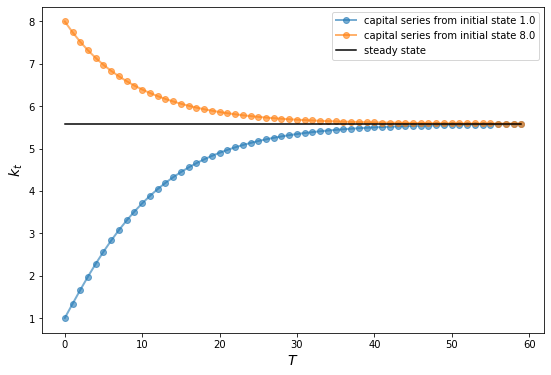

In [33]:
fig, ax = plt.subplots(figsize=(9, 6))
T = 60

s1 = Solow()
s2 = Solow(k=8.0)

# Plot time series for each economy
for s in s1, s2:
    lb = f'capital series from initial state {s.k}'
    ax.plot(s.generate_sequence(T), 'o-', lw=2, alpha=0.6, label=lb)

# Plot the common steady state value of capital

ax.plot([s1.steady_state()]*T, 'k-', label='steady state')
ax.set_xlabel('$T$', fontsize=14)
ax.set_ylabel('$k_t$', fontsize=14)
ax.legend()


### Empirical cumulative distribution function (ecdf) 
#### OUTPUT
$$
F_n(x) := \frac{1}{n}  \sum_{i=1}^n \mathbf{1}\{X_i \leq x\}
  \qquad (x \in \mathbb{R})
$$

- The Glivenko–Cantelli Theorem states that, provided that the sample is IID, the ecdf $F_n$ converges to the true distribution function 　
#### Implementation

- 与えられたサンプルデータ(List型)をinstance dataとして保存
- `__call__` methodでEDCFを計算する


In [34]:
class ECDF():
    def __init__(self, observation):
        self.observations = observation
        
    @property
    def sample_size(self):
        return len(self.observations)
    
    def __call__(self, x):
        tmp = [i for i in self.observations if i <= x]
        return len(tmp)/self.sample_size

In [35]:
# == test == #
np.random.seed(42)
samples = list(np.random.uniform(0, 1, 15))
F = ECDF(samples)

print(F(0.5))  # Evaluate ecdf at x = 0.5

F.observations = list(np.random.uniform(0, 1, 1000))

print(F(0.5))

0.4666666666666667
0.501


### 行列の積

In [36]:
class MatrixProduct():
    def __init__(self, A, B):
        self.A = A
        self.B = B
    def __call__(self):
        N, A_k = self.A.shape
        B_N, K = self.B.shape
        if B_N != A_k:
            raise ValueError("matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 1 is different from 2)")
        res = np.empty((N, K))
        for i in range(N):
            for j in range(K):
                res[i, j] = sum(self.A[i, :] * self.B[:, j])
        return res


In [37]:
a = np.array([[3, 6, 1], [2, 7, 4]])
b = np.array([[1, 8, 6], [3, 5, 8], [1, 1, 2]])
np_res = a @ b
pro = MatrixProduct(a, b)
np.allclose(np_res, pro())

True

## 4. Monte Carlo Simulation and Confidence Interval

In [38]:
import scipy.stats as stats

In [39]:
np.random.seed(42)

## Params
R = 10000
N = 100
mu = 10
sd = 2

H_01 = 10
H_02 = 9.5

CI = []
pval1 = np.empty(R)
pval2 = np.empty(R)

for i in range(R):
    sample = np.random.normal(mu, sd, N)
    sample_mean = np.mean(sample)
    sample_sd = np.std(sample, ddof = 1)
    
    # test under H0 = 10
    test_1 = stats.ttest_1samp(sample, popmean = H_01)
    pval1[i] = test_1.pvalue
    cv = stats.t.ppf(0.975, df = N - 1)
    scale = sample_sd/np.sqrt(N)
    CI.append((sample_mean - cv*scale, sample_mean + cv*scale))
    
    # test under H0 = 9.5
    test_2 = stats.ttest_1samp(sample, popmean = H_02)
    pval2[i] = test_2.pvalue

In [40]:
# count reject H0 trials
reject1 = pval1 <= 0.05
reject2 = pval2 <= 0.05
print(np.count_nonzero(reject1)/R)
print(np.count_nonzero(reject2)/R)

0.0523
0.6897


### CIのなかで一番含まれているvalueを探す

In [41]:
# count CI which include 10 in their intervals
start, end = zip(*CI)
start, end = np.array(start), np.array(end)
num = 1000000
x_range = np.linspace(9, 11, num)
res = np.empty(num)
for i in range(num):
    val = x_range[i]
    tmp_start = start <= val
    tmp_end = end < val
    res[i] = np.count_nonzero(tmp_start) - np.count_nonzero(tmp_end)

print(x_range[np.argmax(res)], res.max())

9.992440992440992 9491.0


`9.992440992440992`がsimulation上最もCIに含まれやすい値となってしまっている。

１０に最も近い`x_range`は

In [42]:
idx = abs(x_range - 10).argmin()
x_range[idx]

9.999998999999

In [43]:
res[idx]

9477.0